# Technologie Hadoop a HDFS

## Co se naučíte?

* spustit kontejnery zajišťující minimální verzi Hadoopu
* pochopíte principy map a reduce
* vyzkoušíte si vytvořit jednoduchý program pro Hadoop 

[Apache Hadoop](https://hadoop.apache.org/) je open source framework je pro zpracování velkého množství nestrukurovaných dat, tedy např. velkého množství souborů. Mezi jeho hlavní vlastnosti patří to, že se jedná  distribuované a  škálovatelné prostředí zaměřené na vysokou dostupnost služeb.
Součástí Hadoop je i distribuovaný souborový systém *HDFS* (Hadoop Distributed File System).

Distribuovaná architektura systému znamená, že jednotlivé soubory jsou rozděleny do redundantních bloků, které jsou na různých místech (uzlech) systému. Škálovatelností rozumíme to, že je možné v případě požadavku do systému připojovat další uzly.
V případě požadavku na zpracování, je úloha paralelizována a probíhá na dílčích uzlech systému. Dílčí výsledky je pak nutno složit dohromady v celkový výsledek. K tomu se používá principu *MapReduce*, viz **následující sheet**. Dokumentace je k dispozici [zde](https://hadoop.apache.org/docs/stable/hadoop-mapreduce-client/hadoop-mapreduce-client-core/MapReduceTutorial.html). 

Ekosystém *Hadoopu* v sobě obsahuje následující komponenty:


*   [HDFS](https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-hdfs/HdfsDesign.html) - distribuovaný souborový systém.
*   [YARN](https://hadoop.apache.org/docs/stable/hadoop-yarn/hadoop-yarn-site/YARN.html)(Yet Another Resource Negotiator) - zodpovědný za správu prostředků.
*   [MapReduce](https://hadoop.apache.org/docs/stable/hadoop-mapreduce-client/hadoop-mapreduce-client-core/MapReduceTutorial.html) - zpracování dat
* [Hadoop Common]((https://hadoop.apache.org/)) - pomocné nástroje pro podporu modulů

Framework obashuje i další části např. [Mahout](https://mahout.apache.org//) pro distribuované numerické výpočty, či [Spark](https://spark.apache.org/) pro provádění analýz a nad daty.

Základní filozofie Apache Hadoop je dobře popsána v knize *Big Data a NoSQL databáze* (Grada 2015) a to v kapitole 4 (strana 64, e-book lze zakoupit na https://www.grada.cz/big-data-a-nosql-databaze-8587/)

Tento text obsahuje i ukázkovou implementaci programu vracející histogram slov, což je obdoba Hello world v oblasti big dat s detailním popisem, jak je program vykonáván. Zde se proto zaměřím je na tři praktické oblasti.

* instalaci
* praktická práce s HDFS
* distribuované výpočty v Pythonu


## HDFS

Architektura HDFS je taková, že data, tedy jednotlivé bloky souborů jsou uchovávány na datových uzlech tzv. *DataNodes* a za organizaci dat mezi uzly je zodpovědný *NameNode*, který uchovává metainformace o souborech. V případě výpadků datových uzlů, je *NameNode* schopen díky redundanci dat odkazovat požadavky na další datové uzly. 
Na obrázku, níže, je tato architektura  zachycena.

Architektura HDFS

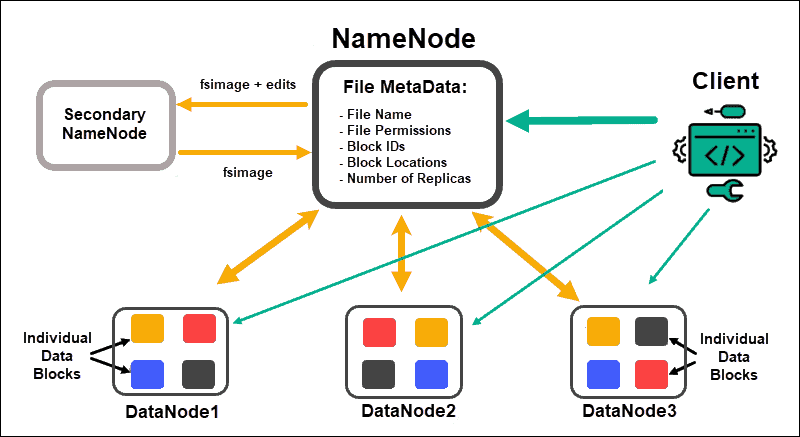

Obrázek převzat ze zdroje:[https://phoenixnap.com/kb/apache-hadoop-architecture-explained](https://phoenixnap.com/kb/apache-hadoop-architecture-explained)

Pro práci s HDFS budeme v dalším používat skript *hdfs*, který nám umožní provádět běžné operace nad souborovým systémem tak, jak je známe z prostředí systému linux. 

Syntaxe je následující 

```
hdfs PRIKAZ [-volby]
```
Pro běžnou práci se soubory budeme používat příkaz *dfs*

Tedy pokud chcem například vypsat obsah *rootu*, tak použijeme:

```
hdfs dfs -ls /
```

Pro vytvoření adresáře *userdata* v rootu:
```
hdfs dfs -mkdir /userdata
```

Pro vykopírováni dat do HDFS použijeme příkaz *put*. Tedy nakopírování lokálního souboru na cestě */home/Petr/data/soubor.txt* do HDFS */userdata* provedeme:
```
hdfs dfs -put /home/Petr/data/soubor.txt /userdata
```

Podobně v otočeném gardu použijeme příkaz *cat*, který čte data a posílá je na standardní výstup, [stdout](https://cs.wikipedia.org/wiki/Standardn%C3%AD_proudy).

Další příkazy pro práce se soubory pomocí [dfs](https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-common/FileSystemShell.html).

Příkaz *dfs* není jediným příkazem, pomocí kterého můžeme ovládat HDFS. Jsou zde různé příkazy pro roli administrátora, který musí zpravovat celý kluster, např. kontrola filesystému, balancování uzlů apod. Přehled je uveden [zde](https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-hdfs/HDFSCommands.html).




## Zprovoznění Hadoop


Pro naše použití  této technologie budeme používat jeho dockerizovanou verzi, která je ke stažení [zde](https://github.com/big-data-europe/docker-hadoop). V dalším předpokládám, že máte k dispozici linuxový stroj.

Nejprve si vytvoříme lokální adresář:

```
mkdir hadoopdocker
```

poté z výše uvedeného odkazu na [git](https://github.com/big-data-europe/docker-hadoop) stáhneme celý repozitář a ve vytvořeném adresáři jej rozbalíme. Vznikne tím v něm adresář *docker-hadoop-master*, který již obsahuje potřebnou inrastrkuturu pro docker.
Pomocí příkazu *cd* do něj vstoupíme:
```
cd hadoopdocker/docker-hadoop-master
```
Poté spustíme *docker*, musíme jej ovšem mít nainstalovaný na daném stroji, viz instalace [zde](https://docs.docker.com/get-docker/):
```
docker-compose up
```
Instalace všech potřebných náležitostí chvilku trvá. Při dalším spuštění stačí už jen provést poslední příkaz. Pokud chceme zastavit, tak příkaz:
```
docker-compose down

```

Ověření startu dockeru zajistíme pomocí:
```
docker ps
```
uvidíme pak, jednotlivé běžící komponenty ekosystému.


### Ověření běhu dockerizovaného Hadoopu

Je možné ověřit běh jednotlivých komponent systému. Lze použít buď postup udávaný [zde](https://www.section.io/engineering-education/set-up-containerize-and-test-a-single-hadoop-cluster-using-docker-and-docker-compose/). Nebo nejprve spustíme daný kontajner, viz výše. A do dalšího okna terminálu v adresáři příslušného kontajneru, v našem případě v *hadoopdocker/docker-hadoop-master*, napíšeme


```
docker network inspect docker-hadoop-master_default
```
Obdržíme následující výstup. Kde jsou vidět jednotlivé *ipadresy* dockerizovaných uzlů clusteru.

### Výstup inspekce
```
[
    {
        "Name": "docker-hadoop-master_default",
        "Id": "fb2d1635f79ee60e325568f61b4597bdc9669b0c206212ae6bac349c93550cc8",
        "Created": "2022-05-24T12:32:18.883154551+02:00",
        "Scope": "local",
        "Driver": "bridge",
        "EnableIPv6": false,
        "IPAM": {
            "Driver": "default",
            "Options": null,
            "Config": [
                {
                    "Subnet": "172.21.0.0/16",
                    "Gateway": "172.21.0.1"
                }
            ]
        },
        "Internal": false,
        "Attachable": true,
        "Ingress": false,
        "ConfigFrom": {
            "Network": ""
        },
        "ConfigOnly": false,
        "Containers": {
            "2b5295b820e17eedb8f98c70d146b428ff95105c5ae951bc41c83475a79fc9f3": {
                "Name": "namenode",
                "EndpointID": "04ad3f6bcad34a9aaac892fc6b63448a15dc1f52eb0febadbb7bc7421678938d",
                "MacAddress": "02:42:ac:15:00:02",
                "IPv4Address": "172.21.0.2/16",
                "IPv6Address": ""
            },
            "47dfec0900648b7460821af1e29bc30cf62ae5eb317c91fcde80fc44dccb4c6d": {
                "Name": "nodemanager",
                "EndpointID": "a5e03d23760b5c31668dbb5876bb0b9c4fea6b689a72f8d6b76ba39145efd5fa",
                "MacAddress": "02:42:ac:15:00:05",
                "IPv4Address": "172.21.0.5/16",
                "IPv6Address": ""
            },
            "69e8cb0f28cd7d49f89d2bc2026d38609b50507c654ea2d5457a3cd16226717e": {
                "Name": "datanode",
                "EndpointID": "bb6b4212ebceab24ba302dee297d211fd3019a64cabd106307088d93f3165c2c",
                "MacAddress": "02:42:ac:15:00:06",
                "IPv4Address": "172.21.0.6/16",
                "IPv6Address": ""
            },
            "9806f318a018bd7770072e9737106e6679d226aaab8b0504c6c940aa784d8e64": {
                "Name": "historyserver",
                "EndpointID": "1860dc540733226af9853d0a966ebc8028ab7b2251ed7a10690ec6d6359b187a",
                "MacAddress": "02:42:ac:15:00:04",
                "IPv4Address": "172.21.0.4/16",
                "IPv6Address": ""
            },
            "cc8e4827185bc24e934d67350231baab749def2762cd7ce7b0d683320f146f07": {
                "Name": "resourcemanager",
                "EndpointID": "b311317528c4fe2a2b1d52c0c2d9ca6ff40803317085329e104a5f0613e1daf5",
                "MacAddress": "02:42:ac:15:00:03",
                "IPv4Address": "172.21.0.3/16",
                "IPv6Address": ""
            }
        },
        "Options": {},
        "Labels": {
            "com.docker.compose.network": "default",
            "com.docker.compose.project": "docker-hadoop-master",
            "com.docker.compose.version": "1.25.0"
        }
    }
]

```



K uvedeným uzlům, lze přistupovat pomocí uvedené adresy a portu v prohlížeči.
Jednotlivé porty [dle](https://www.section.io/engineering-education/set-up-containerize-and-test-a-single-hadoop-cluster-using-docker-and-docker-compose/) jsou:
*     datanode - port 9864
*     nodemanager - port 8042
*     namenode  - port 9870
*     historyserver - port 8188
*     resourcemanager - port 8088

Napíšeme - li do adresního řádku prihlížeče (ipadresa, viz výše)
```
http://172.21.0.2:9870/
```
tak se dostaneme k webovému rozhraní *namenodu*. K ostatním uzlům je to podobné.




### Spouštění příkazů

Opět předpokládáme, že je spuštěný daný kontajner, a že se nacházíme v něm. V příkazové řádce si spustíme interaktivní shell běžící na *namenodu*:
```
docker exec -it namenode /bin/bash
```

Nejprve ověříme, co je v souborovém systému vytvořeno (nic):
```
hdfs dfs -ls /
```
a obdržíme něco podobného:


```
Found 1 items
drwxr-xr-x   - root supergroup          0 2022-05-04 10:56 /rmstate
```

Nyní si vytvoříme adresář, do kterého budeme nahrávat soubory pro zpracování. Abychom dodrželi nějakou štábní kulturu (zjednodušuje se tím odkazovíní souborů), tak si pro uživatele *root* vytvoříme v adresáři *user* vlastní adresář (*root*) a v něm další adresář pro data (*data*). Protože jsme líní, tak to uděláme v jednom řádku, za použití přepínače *p*:
```
hdfs dfs -mkdir -p /user/root/data
```
V shellu můžeme vytvořit domovský adresář na HDFS systému (je to nutné pro další zpracování).

A pro jistoti ověříme.

```
hdfs dfs -ls
```

(místo `hdfs dfs` lze využít `hadoop fs`).

Do lokálního systému kontejneru stáhneme ukázkový soubor (i když je *Vojna a mír* pověstná bichle, zdaleka nezaplní ani jeden blok HDFS).

```curl https://www.gutenberg.org/files/2600/2600-0.txt > war_and_peace.txt```


```hdfs dfs -put ./war_and_peace.txt /user/root```


> **Úkol**: Prozkoumejte a popřípadě vyzkoušejte další příkazy HDFS. (např. zde https://www.geeksforgeeks.org/hdfs-commands/)


## Map-Reduce

Základní mechanismus Hadoopu je implementace distribuovaného zpracování typu map a reduce. Detailní popis celého mechanismu je v *Big Data a NoSQL databáze* (včetně příkladu jeho využití v jazyce Java).

Zde tedy jen stručně:

Funkce `Map` slouží ke zpracování každého objektu z množiny vstupních dat (v tectovém vstupu je to typicky řádek) a jejím výstupem je jedna nebo více dvojic (klíč, hodnota) pro každý zpracovaný objekt.

Funkce `Reduce` slouží ke sloučení výsledků (hodnot) pro jednotlivé klíče z předchozí fáze do celkového výsledku.

Funkce `Map` realizuje funkcionál `map` (https://en.wikipedia.org/wiki/Map_(higher-order_function)) a `Reduce` funkcionál `fold` (https://en.wikipedia.org/wiki/Fold_(higher-order_function)). Ty jsou všeobecně užívané a to nikoliv jen ve funkcionálním programování. Hadoop však (při běžném nasazení) přináší masívní paralelismus.

obecný tvar funkcí:

Map: $K_1 \times H_2 \rightarrow K_2 \times H_2$, kde $K_1$, $K_2$ jsou množiny klíčů a $H_1$, $H_2$ množiny hodnot

Reduce: $(K_2, P(H_2)) \rightarrow (K_2, P(H_2)$, kde druhý člen dvojice je neuspořádaná množina všech hodnot, které vrátila mapovací fáze s určitým klíčem (tj. prvek potenční množiny).

Mezi oběma fázemi je nutno (distribuovaně) seskupit hodnoty se stejným klíčem, což je běžně zajištěno setříděním.

Graficky si lze základní kroky znázornít například takto:

![map & reduce](https://i.stack.imgur.com/oxR94.jpg)

Výše uvedené kroky jsou základní (ovlivnit lze i další pomocné) a lze je přirozeně provádět i opakovaně.

## Hadoop streaming

Hadoop přímo podporuje jen jediné vývojové prostředí — standardní Java SDK. Lze však využít tzv. *Hodoop streaming*, kdy jsou jednotlivé fáze (tj. minimálně mapovací a redukční) vykonávány libovolným programem očekávající vstupní data na standardní vstupu a produkujícím výstup na standardní.

Distribuovaný program je tak možno napsat v téměř libovolném vývojovém prostředí včetně např. shellu. Zvlášť snadné je použití skriptovacích jazyků např. Pythonu. Je však třeba si uvědomit, že toto řešení není dokonalé, neboť vyžaduje instalaci běhových prostředí na všech uzlech (tj. například Pythonu). Není také nijak zvlášť efektivní neboť přináší dodatečnou režii se spuštěním jednotlivých procesů a vytvářením síťových socketů, které je spojují.

To značně komplikuje použití výše uvedené dockerizované verze Hadoopu, jenž obsahuje pouze základní linuxové nástroje (založení na minimální instalaci Ubuntu). Použít lze pouze shell skripty, které moho využívaj jen základní aplikace. Pythho není k dispozici vůbec. Z tohoto důvodu je nutné dodat Python do některých Docker obrazů:

1. do YARNu (správce prostředků)
2. do workerů (`nodemanager`)

Rozšířený Dockerfile pro pracovní uzel má následující tvar (obrazy jsou založeny na Debian Linuxu, a instalována je i knihovna `mrjob` využívaná v následující sekci):
    
```Dockerfile
FROM bde2020/hadoop-nodemanager:2.0.0-hadoop3.2.1-java8

RUN apt-get update && apt-get install -y python3 python3-pip
RUN pip3 install mrjob
```

Podobně je změněn i obraz pro správce prostředků.

> **Úkol**: Proveďte změny a modifikujte i yaml soubor pro vytváření kompozitního kontejneru.

Nyní připravíme dva skripty, které busdsou řešit klasický ukázkový příklad pro Hadoop — zjištění počtu výskytů jednotlivých slov (resp. jejich tvarů) v textovém souboru.

První provádí mapování. Vstup můžeme interpretovat jako jedinou hodnotu (s prázdným klíčem) a je předán na standardním vstupem. Výstupem je množina dvojic klíč, hodnota, kde jednotlivé dvojice tvoří řádky (oddělovačem je tudíž odřádkování). Klíč je pak od hodnoty oddělen tabulátorem (což je pro Hadoop streaming standardní oddělovač).

In [4]:
%%writefile mapper.py
#!/usr/bin/env python3
import sys

for line in sys.stdin: # v každém řádku
    words = line.split() # rozdělení na slova

    for word in words: # pro každé slovo
        print(f'{word}\t{1}') # vrací dvojici (slovo, 1)

Overwriting mapper.py


Redukční skript je o něco komplexnější. Přijímá dvojice od mapperu a vrací součet hodnot. Protože každý výskyt slova je doprovázen hodnotou získáme jejich součtem celkový počet výskytů. Přitom se předokládá, že:

* hodnoty pro každý jednotlivý klíč jsou zpracovány právě jedním uzlem `worker` (není nutné vytvářet součty součtů)
* vstuoní dvojice jsou sařazené podle klíčů (tj. tvoří souvislou posloupnost řádků).

Výstupem je dvojice, kde klíčem je opět slovo a hodnotou součet (obecně to může být i množina hodnot, v tomto případě je tudíž jednoprvková).

In [5]:
%%writefile reducer.py
#!/usr/bin/env python3
import sys

curr_word = None
curr_count = 0


for line in sys.stdin:
    word, count = line.split('\t')
    count = int(count)

    if word == curr_word: # slovo je 
        curr_count += count
    else:
        if curr_word:
            print(f'{curr_word}\t{curr_count}')
        curr_word = word

if curr_word == word: # pro poslední slovo
    print(f'{curr_word}\t{curr_count}')

Overwriting reducer.py


Nyní už můžeme v kontejneru správce prostředků spustit celý distribuovaný proces.

`docker exec -it namenode /bin/bash`

Nejdříve oba soubory označíme jako spustitelné.

`# chmod a+x mapper.py reducer.py`

Pak vyzkoušíme jak fungují lokálně (tj. nedistribuovaně), soubor `war_and_peace.txt` musí být v lokálním adresáři.

`cat war_and_peace.txt | ./mapper.py | sort -t 1 | ./reducer.py`

A nyní už můžeme spustit distribuované zpracování (proměnná shellu `HADOOP_HOME` musí obsahovat adresář hadoopu v lokálním souborovém systému kontejneru). Vstupní soubor musí být umístěn v HDFS v domovském adresáři uživatele.

```bash
$HADOOP_HOME/bin/hadoop jar
$HADOOP_HOME/mapred/contrib/streaming/hadoop-streaming*.jar \
-files mapper.py,reducer.py \
-mapper mapper.py \
-reducer reducer.py \
-input /user/root/war_and_peace.txt -output /user/hduser/histogram.txt
```

> **Úkol**: Toto řešení je neefektivní, neboť mapper nemusí vracet dvojici pro každý výskyt slova (s hodnotou jedna), ale vždy jen jednu dvojici pro každéí slovo, které najde ve svém fragmentu vstupního souboru (hodnotou je jeho počet) tj. lokální histogram. Vytvořte tento efektivnější mapper (např, za pomoci kolekce `colections.Counter`).

Rozdělení na dva skripty je nepřehledné a program nevyužívá žádný z typických konstrukcí Pythonu (není například objektový). Řešením je použití knihovny `mrjob`, která využívá Hadoop streaming, ale nabízí pythoničtější rozhraní.